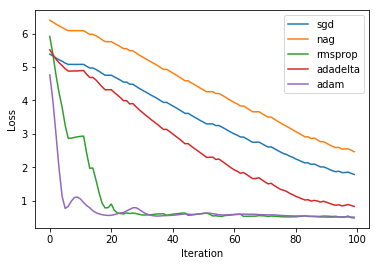

In [1]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

def get_data():
    data = load_svmlight_file("a9a")
    x_train = data[0].toarray()
    y_train = data[1]
    for i in range(0, len(y_train)):
        if y_train[i] == -1:
            y_train[i] = 0
    temp = np.ones(shape=[32561, 1], dtype=np.float32)
    x_train = np.concatenate([x_train, temp], axis=1)
    return x_train, y_train

def get_test():
    data = load_svmlight_file("a9a.t")
    x_test = data[0].toarray()
    y_test = data[1]
    for i in range(0, len(y_test)):
        if y_test[i] == -1:
            y_test[i] = 0
    temp = np.zeros(shape=[16281, 1], dtype=np.float32)
    temp1 = np.ones(shape=[16281, 1], dtype=np.float32)
    x_test = np.concatenate([x_test, temp, temp1], axis=1)
    return x_test, y_test

def sigmoid(input_):
    return 1 / (1 + np.exp(-input_))

def train(x_train, y_train, x_test, y_test, method, iters, test_errors):
    iterations = 100
    num_samples, num_features = x_train.shape
    num_test_samples, num_test_features = x_test.shape
    theta = random.rand(num_features)
    

    if method == 'sgd':
        rate = 0.01

        for i in range(iterations):
            output = sigmoid(np.dot(x_train[i], theta))
            error = output - y_train[i]
            theta = theta - rate * np.dot(x_train[i], error)

            predict_error = 0
            for j in range(num_test_samples):
                predict_output = sigmoid(np.dot(x_test[j], theta))
                predict_error -= y_test[j] * np.log(predict_output) + (1 - y_test[j]) * np.log(1 - predict_output)

            iters.append(i)
            test_errors.append(predict_error / num_test_samples)

    if method == 'nag':
        rate = 0.01
        miu = 0.9
        momentum = np.zeros(num_features)

        for i in range(iterations):
            output = sigmoid(np.dot(x_train[i], theta - rate * miu * momentum))
            error = output - y_train[i]
            grad = np.dot(x_train[i], error)
            momentum = momentum * rate + grad
            theta = theta - rate * momentum

            predict_error = 0
            for j in range(num_test_samples):
                predict_output = sigmoid(np.dot(x_test[j], theta))
                predict_error -= y_test[j] * np.log(predict_output) + (1 - y_test[j]) * np.log(1 - predict_output)

            iters.append(i)
            test_errors.append(predict_error / num_test_samples)

    if method == 'rmsprop':
        rate = 0.1
        e = 1
        rho = 0.95
        delta = 10e-7

        for i in range(iterations):
            output = sigmoid(np.dot(x_train[i], theta))
            error = output - y_train[i]
            grad = np.dot(x_train[i], error)
            norm = grad * grad
            expectation = rho * e + (1 - rho) * norm
            theta = theta - rate * grad / (np.sqrt(expectation) + delta)

            predict_error = 0
            for j in range(num_test_samples):
                predict_output = sigmoid(np.dot(x_test[j], theta))
                predict_error -= y_test[j] * np.log(predict_output) + (1 - y_test[j]) * np.log(1 - predict_output)
            iters.append(i)
            test_errors.append(predict_error / num_test_samples)

    if method == 'adam':
        delta = 10e-8
        rho1 = 0.9
        rho2 = 0.999
        rate = 0.1
        s = 0
        r = 0

        for i in range(iterations):
            output = sigmoid(np.dot(x_train[i], theta))
            error = output - y_train[i]
            grad = np.dot(x_train[i], error)

            s = rho1 * s + (1 - rho1) * grad
            r = rho2 * r + (1 - rho2) * grad * grad
            s_hat = s / (1 - rho1)
            r_hat = r / (1 - rho2)
            delta_theta = (-rate * s_hat) / (np.sqrt(r_hat) + delta)
            theta = theta + delta_theta

            predict_error = 0
            for j in range(num_test_samples):
                predict_output = sigmoid(np.dot(x_test[j], theta))
                predict_error -= y_test[j] * np.log(predict_output) + (1 - y_test[j]) * np.log(1 - predict_output)
            iters.append(i)
            test_errors.append(predict_error / num_test_samples)

    if method == 'adadelta':
        r = 0
        e = 0
        miu = 0.9
        delta = 10e-7
        rate = 10

        for i in range(iterations):
            output = sigmoid(np.dot(x_train[i], theta))
            error = output - y_train[i]
            grad = np.dot(x_train[i], error)

            r = miu * r + (1 - miu) * grad * grad
            delta_theta = (-rate * grad * np.sqrt(e + delta)) / (np.sqrt(r + delta))
            theta = theta + delta_theta
            e = miu * e + (1 - miu) * e * e


            predict_error = 0
            for j in range(num_test_samples):
                predict_output = sigmoid(np.dot(x_test[j], theta))
                predict_error -= y_test[j] * np.log(predict_output) + (1 - y_test[j]) * np.log(1 - predict_output)
            iters.append(i)
            test_errors.append(predict_error / num_test_samples)

def main():
    x_train, y_train = get_data()
    x_test, y_test = get_test()
    
    methods = ['sgd', 'nag', 'rmsprop', 'adadelta', 'adam']
    for method in methods:
        iters = []
        test_errors = []
        train(x_train, y_train, x_test, y_test, method, iters, test_errors)
        plt.plot(iters, test_errors, label=method)

main()
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()